In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import umap

# Increase matplotlib resolution
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200

# Change color palette
sns.color_palette("husl", 8)

# Data Loading 
os.chdir("..")
from data.loader import load_training, load_validation, load_testing, n_freq, n_time, n_classes

/home/saps/micromamba/envs/oticon/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/saps/micromamba/envs/oticon/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/saps/micromamba/envs/oticon/lib/python3.10/site-packages/umap/dist

In [2]:
X_train, y_train = load_training()
X_train = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])

X_val, y_val = load_validation()
X_val = X_val.reshape(-1, X_val.shape[1] * X_val.shape[2])

X_mu = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train - X_mu) / X_std
X_val = (X_val - X_mu) / X_std

In [3]:
# PCA
model_pca = PCA(n_components=2)
model_pca.fit(X_train)

X_trans_pca = model_pca.transform(X_val)

In [4]:
# UMAP
model_umap = umap.UMAP(n_neighbors=40, negative_sample_rate=10, local_connectivity=8, spread=5, min_dist=0.05)
model_umap.fit(X_train)

X_trans_umap = model_umap.transform(X_val)

/home/saps/micromamba/envs/oticon/lib/python3.10/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


In [5]:
def plot_predictions(y_pred):
    plt.grid()
    plt.axis("off")

    correct_idx = y_pred == y_val
    plt.scatter(*X_trans_umap[correct_idx].T, s=0.9, c="green", alpha=0.6)
    plt.scatter(*X_trans_umap[~correct_idx].T, s=0.9, c="red", alpha=0.6)
    
    plt.legend(["Correct", "Incorrect"])
    plt.show()
    
    print("Accuracy: {:.2f}%".format(100 * correct_idx.mean()))


def plot_classes(X):
    plt.grid()
    plt.axis("off")

    for target in range(n_classes):
        plt.scatter(*X[y_val == target].T, s=0.9, alpha=0.6)

    plt.legend([f"Class {i}" for i in range(n_classes)])
    plt.show()

# PCA

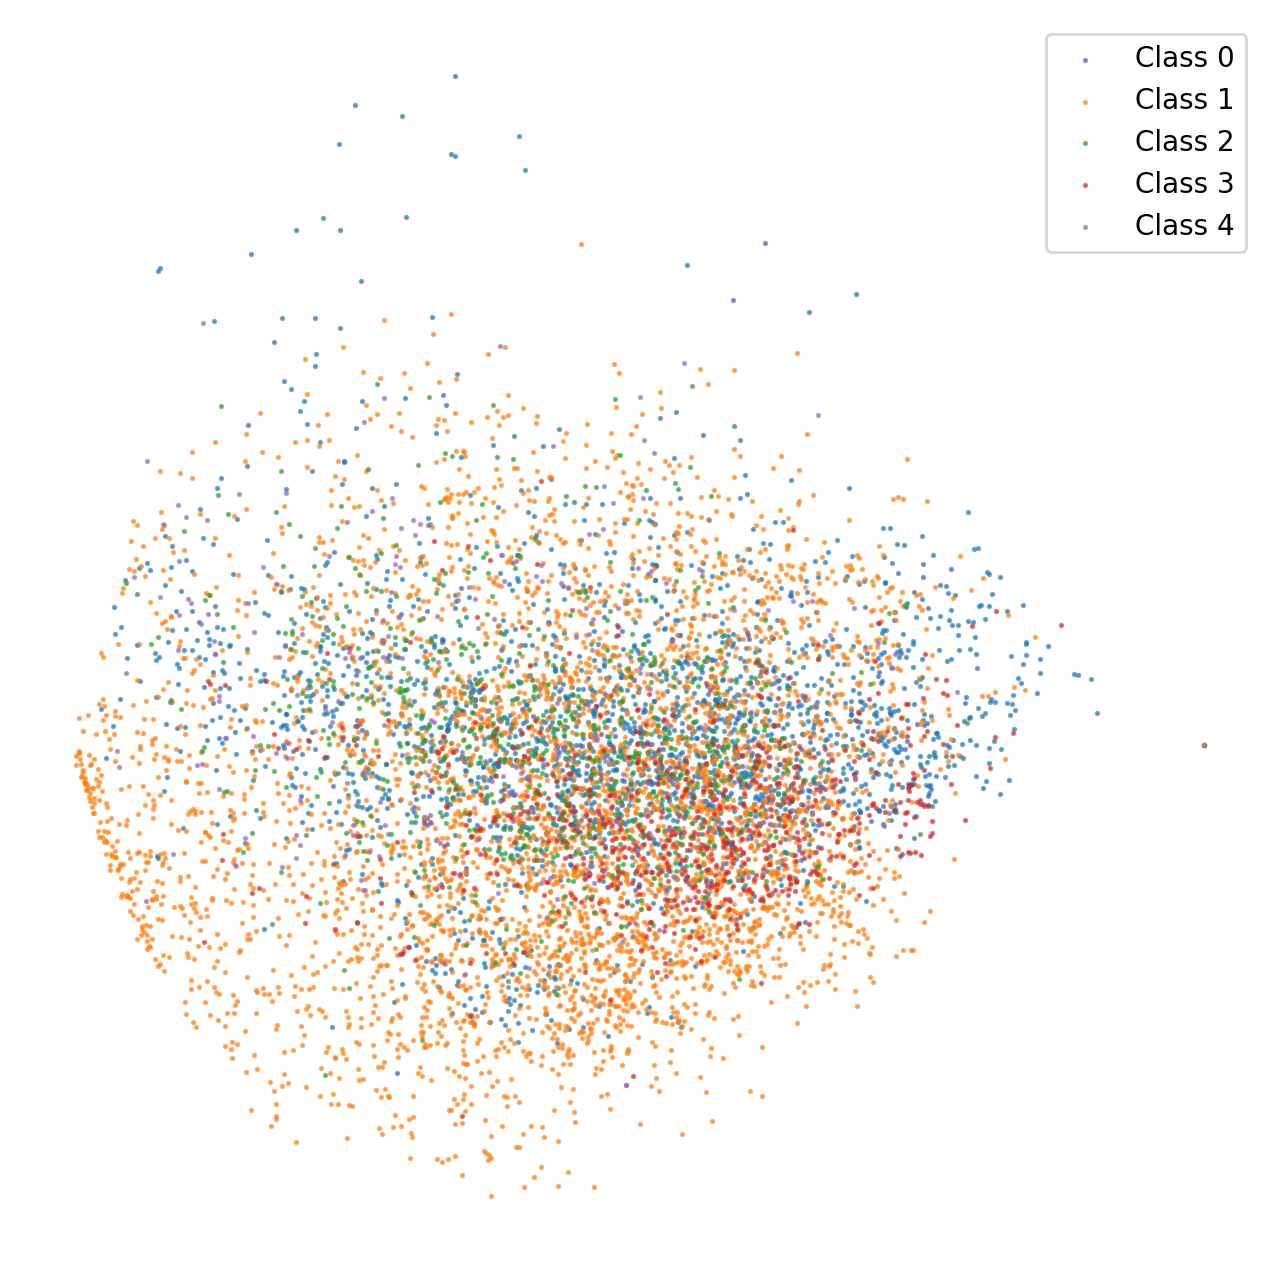

In [6]:
plot_classes(X_trans_pca)

# UMAP

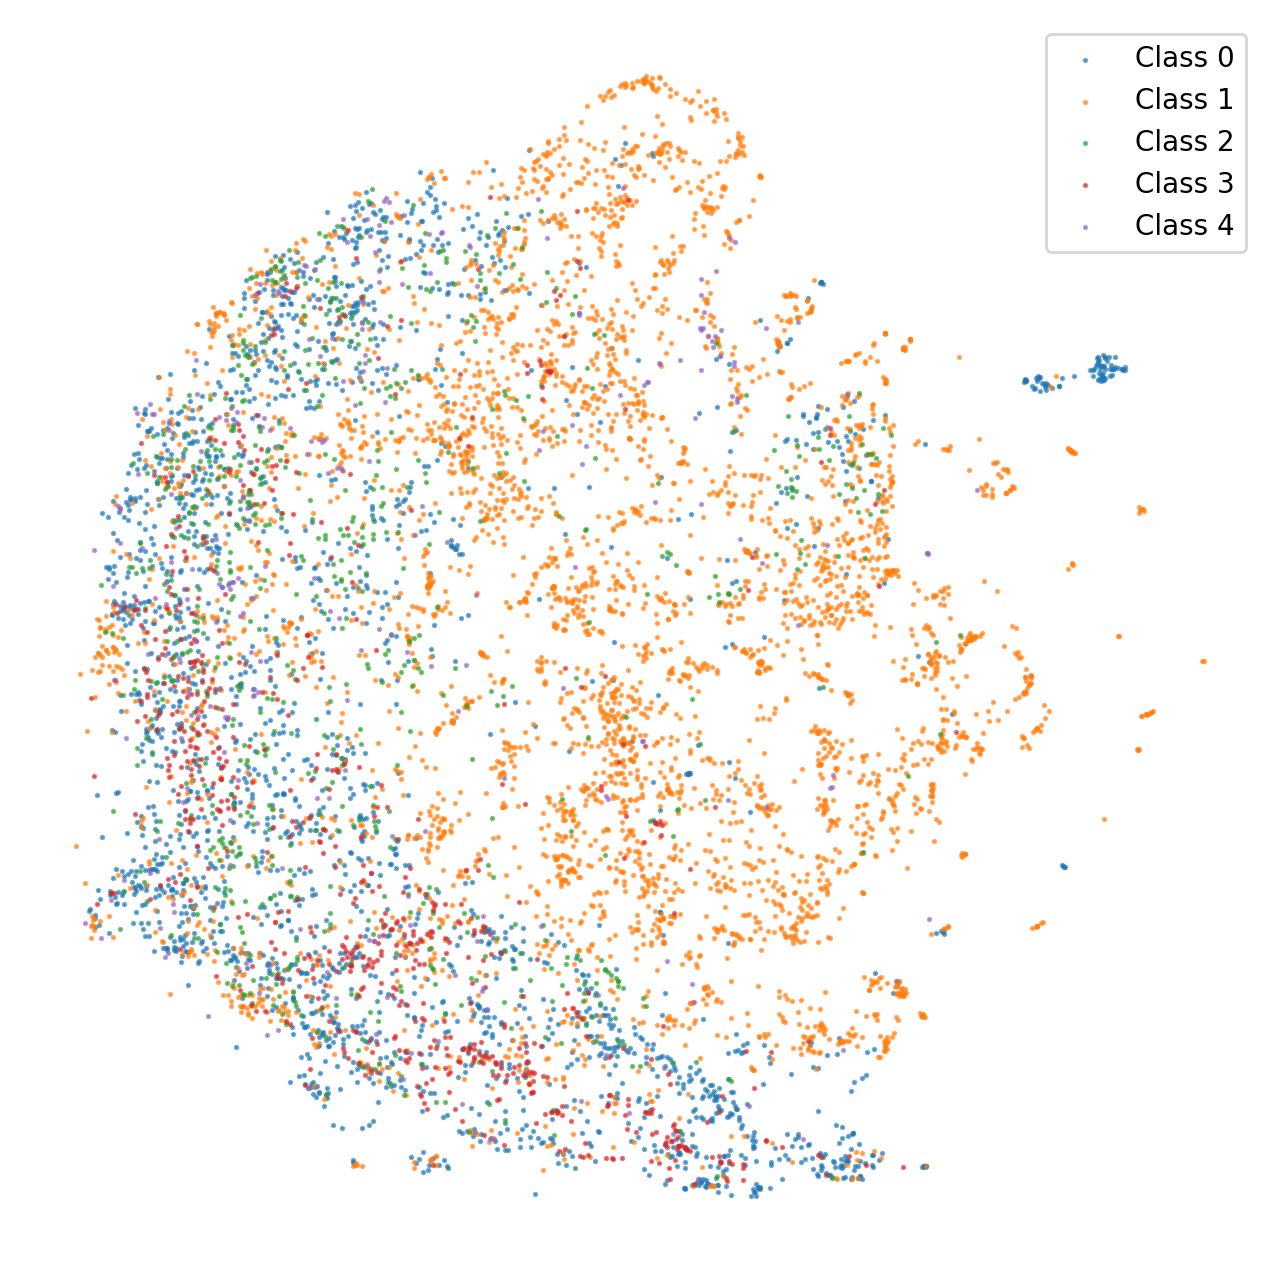

In [7]:
plot_classes(X_trans_umap)

# Logistic regression

/home/saps/micromamba/envs/oticon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


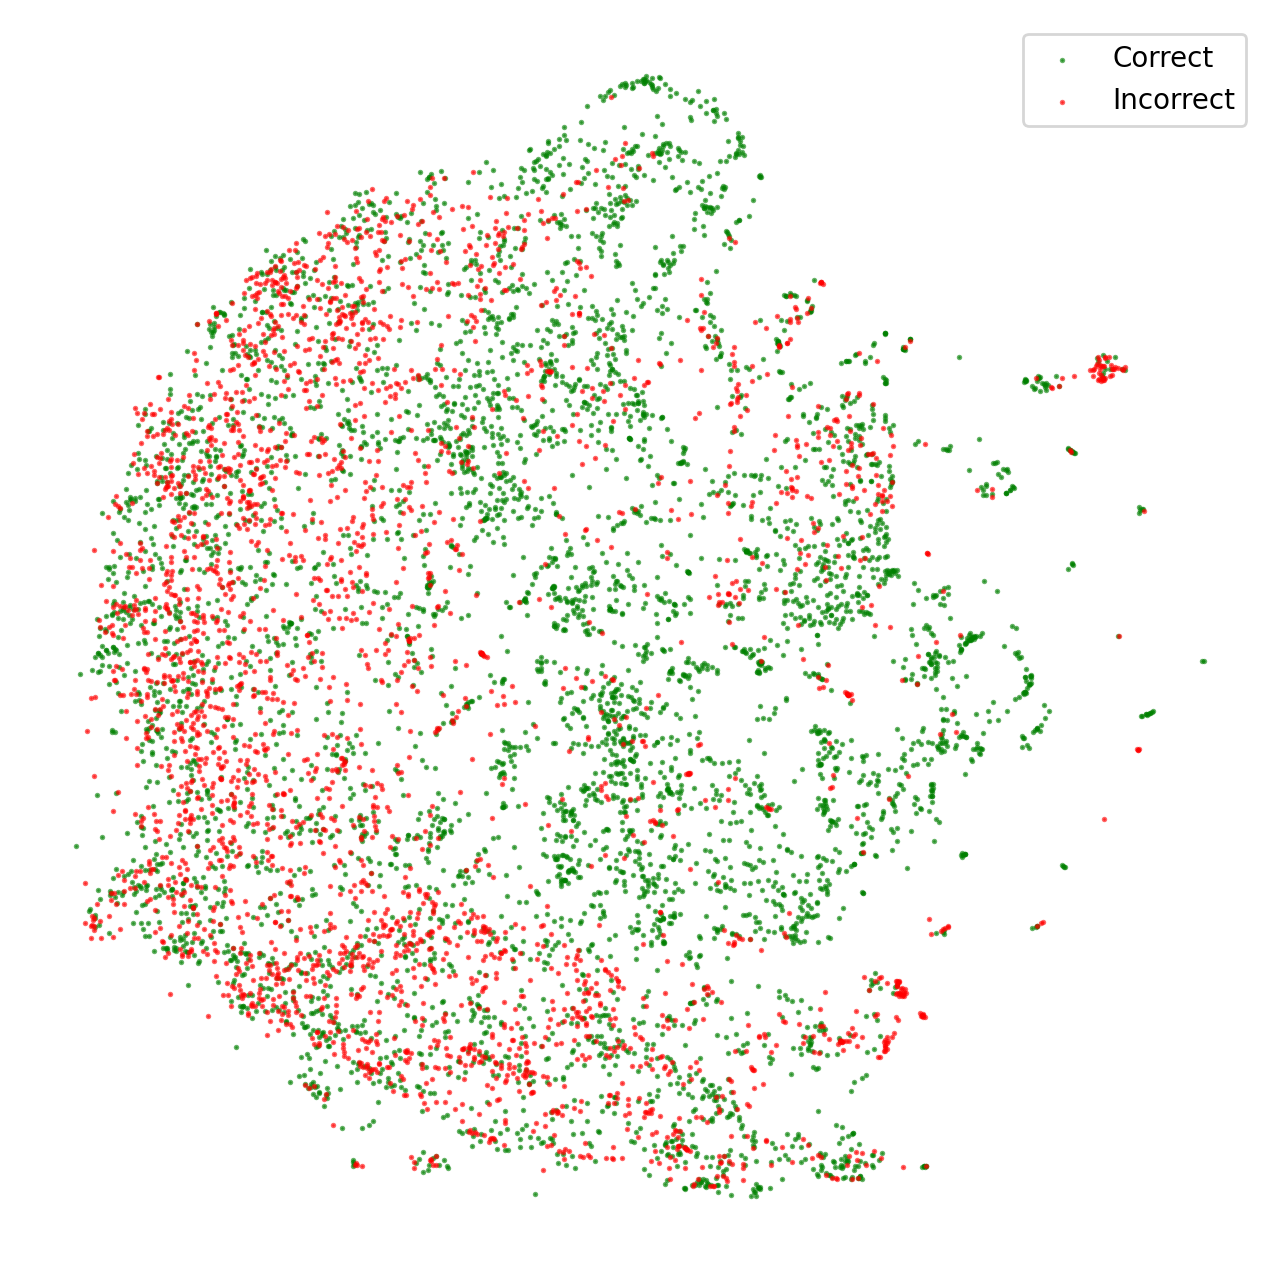

Accuracy: 63.90%


In [8]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_log = model_log.predict(X_val)

plot_predictions(y_log)

# Feature transformations

/home/saps/micromamba/envs/oticon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


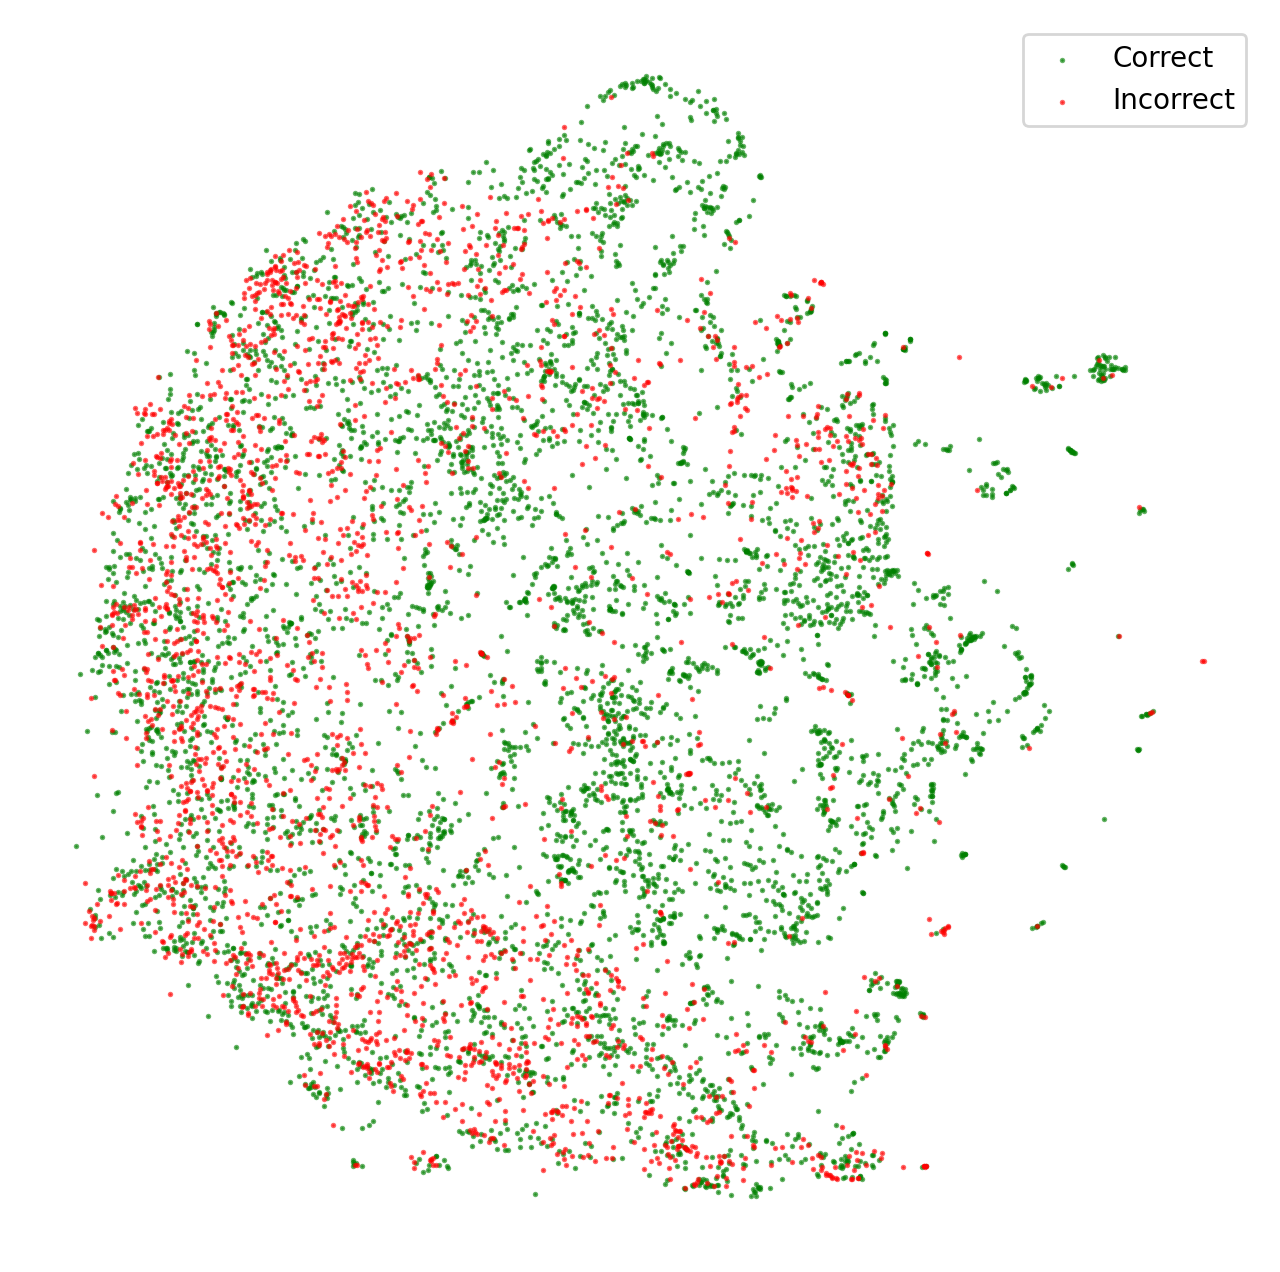

Accuracy: 68.37%


In [9]:
X_train_feat = np.hstack((X_train, X_train**2, X_train**3, np.sin(X_train), np.cos(X_train)))
X_val_feat = np.hstack((X_val, X_val**2, X_val**3, np.sin(X_val), np.cos(X_val)))

model_log_trans = LogisticRegression()
model_log_trans.fit(X_train_feat, y_train)

y_log_feat = model_log_trans.predict(X_val_feat)

plot_predictions(y_log_feat)

# Naive MLP

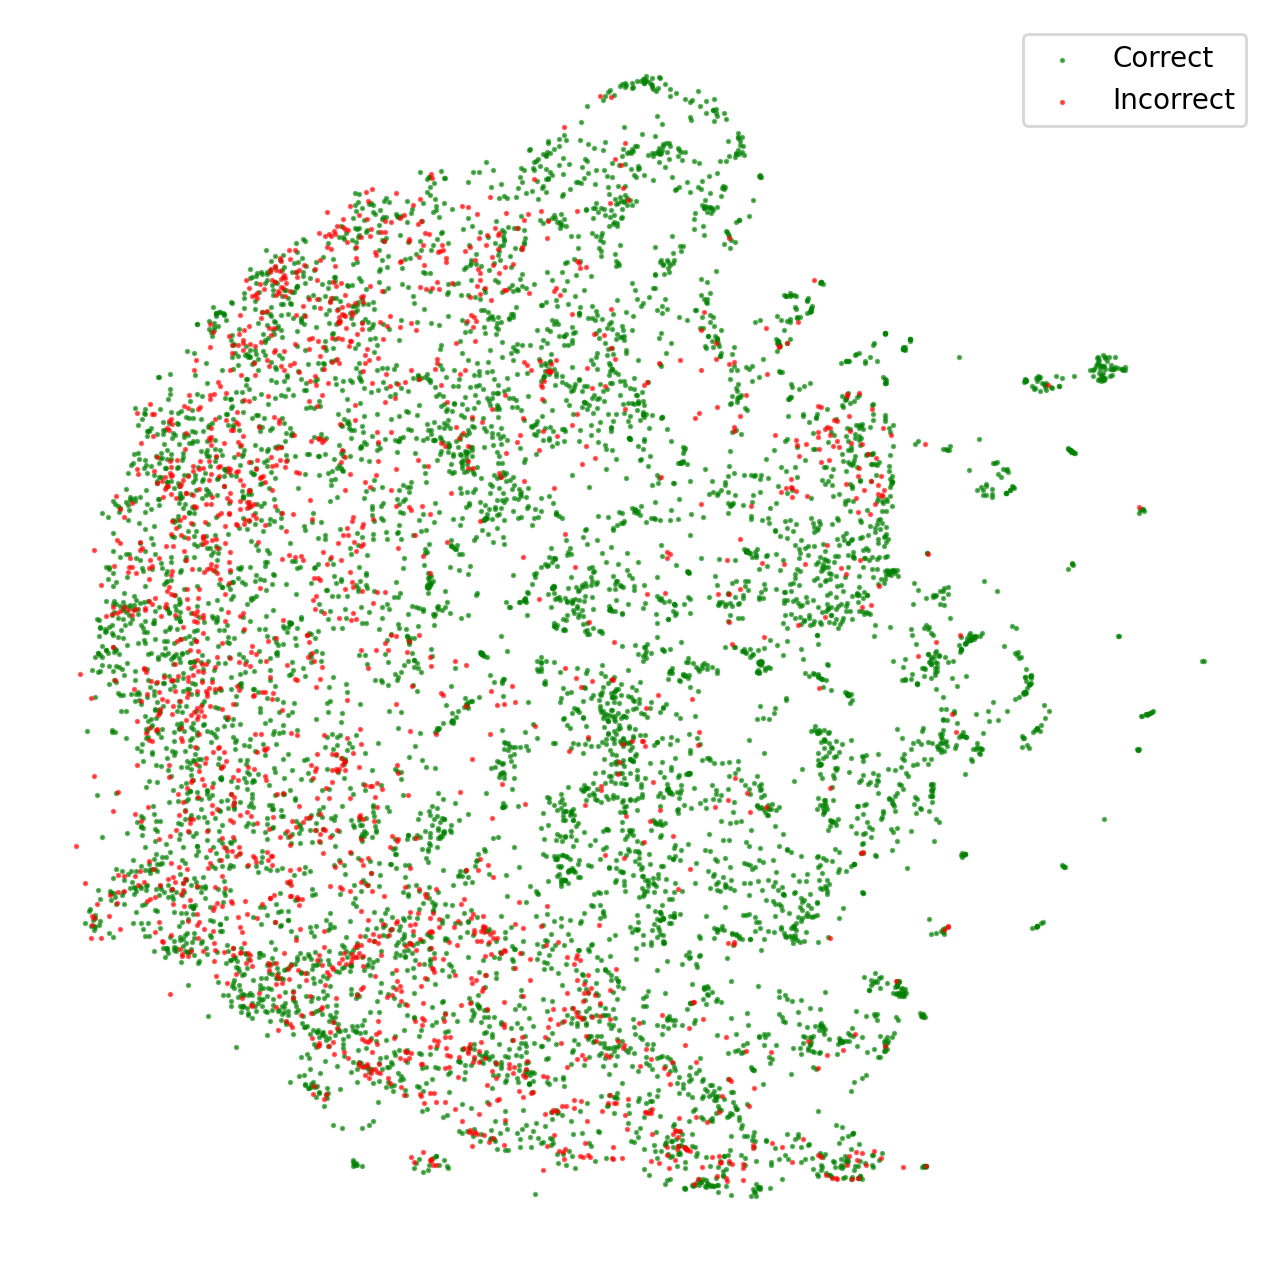

Accuracy: 79.09%


In [10]:
model_mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128),
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.2,
    random_state=133742069,
)
model_mlp.fit(X_train, y_train)

y_mlp = model_mlp.predict(X_val)

plot_predictions(y_mlp)